In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

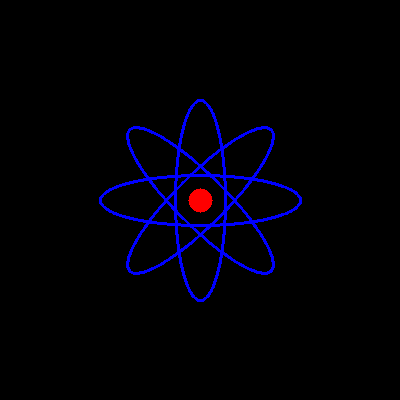

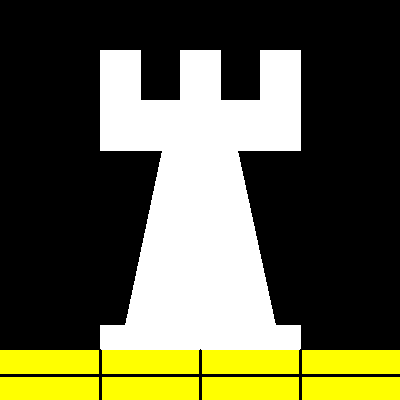

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

W = 400

def my_ellipse(img, angle):
    thickness = 2
    line_type = 8

    cv.ellipse(img,
                (W // 2, W // 2),
                (W // 4, W // 16),
                angle,
                0,
                360,
                (255, 0, 0),
                thickness,
                line_type)

def my_filled_circle(img, center):
    thickness = -1
    line_type = 8

    cv.circle(img,
               center,
               W // 32,
               (0, 0, 255),
               thickness,
               line_type)

def my_polygon(img):
    line_type = 8

    # Create some points
    ppt = np.array([[W / 4, 7 * W / 8], [3 * W / 4, 7 * W / 8],
                    [3 * W / 4, 13 * W / 16], [11 * W / 16, 13 * W / 16],
                    [19 * W / 32, 3 * W / 8], [3 * W / 4, 3 * W / 8],
                    [3 * W / 4, W / 8], [26 * W / 40, W / 8],
                    [26 * W / 40, W / 4], [22 * W / 40, W / 4],
                    [22 * W / 40, W / 8], [18 * W / 40, W / 8],
                    [18 * W / 40, W / 4], [14 * W / 40, W / 4],
                    [14 * W / 40, W / 8], [W / 4, W / 8],
                    [W / 4, 3 * W / 8], [13 * W / 32, 3 * W / 8],
                    [5 * W / 16, 13 * W / 16], [W / 4, 13 * W / 16]], np.int32)
    ppt = ppt.reshape((-1, 1, 2))
    cv.fillPoly(img, [ppt], (255, 255, 255), line_type)
    # Only drawind the lines would be:
    # cv.polylines(img, [ppt], True, (255, 0, 255), line_type)

def my_line(img, start, end):
    thickness = 2
    line_type = 8

    cv.line(img,
             start,
             end,
             (0, 0, 0),
             thickness,
             line_type)

atom_window = "Drawing 1: Atom"
rook_window = "Drawing 2: Rook"

# Create black empty images
size = W, W, 3
atom_image = np.zeros(size, dtype=np.uint8)
rook_image = np.zeros(size, dtype=np.uint8)


# 1.a. Creating ellipses
my_ellipse(atom_image, 90)
my_ellipse(atom_image, 0)
my_ellipse(atom_image, 45)
my_ellipse(atom_image, -45)

# 1.b. Creating circles
my_filled_circle(atom_image, (W // 2, W // 2))


# 2. Draw a rook
# ------------------
# 2.a. Create a convex polygon
my_polygon(rook_image)

cv.rectangle(rook_image,
              (0, 7 * W // 8),
              (W, W),
              (0, 255, 255),
              -1,
              8)


#  2.c. Create a few lines
my_line(rook_image, (0, 15 * W // 16), (W, 15 * W // 16))
my_line(rook_image, (W // 4, 7 * W // 8), (W // 4, W))
my_line(rook_image, (W // 2, 7 * W // 8), (W // 2, W))
my_line(rook_image, (3 * W // 4, 7 * W // 8), (3 * W // 4, W))

cv2_imshow(atom_image)
cv2_imshow(rook_image)

# In Colab, cv2_imshow displays images directly, so cv.moveWindow, cv.waitKey, and cv.destroyAllWindows are not needed and can cause issues.
# cv.moveWindow(atom_window, 0, 200)
# cv.imshow(rook_window, rook_image)
# cv.moveWindow(rook_window, W, 200)
# cv.waitKey(0)
# cv.destroyAllWindows()